In [1]:
import numpy as np
import operator
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = 'svg'
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

# kNN分类器

## 准备：构建数据

In [22]:
def create_data_set():
    """
    构造数据集。
    
    Returns
    -------
    group : numpy.ndarray
        4组数据，每组数据有两个特征
    labels : str
        4个标签信息
    """
    group = np.array([[1.0, 1.1], 
                      [1.0, 1.0],
                      [0, 0],
                      [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [23]:
group, labels = create_data_set()

In [24]:
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]])

In [25]:
labels

['A', 'A', 'B', 'B']

我们通常只能可视化处理三维以下的事务，因此为了简单地实现数据可视化，对于每个数据点，我们通常只使用两个特征。

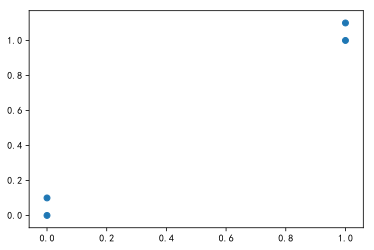

In [26]:
# 绘制4个点
x = group[:, 0]
y = group[:, 1]
plt.scatter(x, y)

## kNN分类算法

In [27]:
def classify0(in_x, data_set, labels, k):
    """
    基于k-近邻算法分类器。
    
    Parameters
    ----------
    in_x : 用于分类的输入向量
    data_set : 训练样本集
    labels : 标签向量
    k : 选择最近邻居的数目
    
    Returns
    -------
    classify : str
        预测分类
    """
    # 距离计算
    data_set_size = data_set.shape[0]    # 训练数据集个数
    distances = ((data_set - in_x)**2).sum(axis=1)**0.5    # 欧式距离
    sorted_dist_indicies = distances.argsort()
    
    class_count = {}
    for i in range(k):
        vote_label = labels[sorted_dist_indicies[i]]    # 距离最小的k个点对应的分类
        class_count[vote_label] = class_count.get(vote_label, 0) + 1    # 分别对每个分类进行数量统计
    # end for 

    # 找出前k个中，数量最多的分类
    z = zip(class_count.values(), class_count.keys())
    sorted_class_count = sorted(z, reverse=True)
    
    classify = sorted_class_count[0][1]
    return classify

构造完kNN算法，我们可以预测一个列表数据所属分类：

In [28]:
classify0([0,0], group, labels, 3)

'B'

In [29]:
classify0([1,0.8], group, labels, 3)

'A'

# 改进约会网站的配对效果

## 准备数据：从文本文件中解析数据

样本数据主要包含以下3种特征：
* 每年获得的飞行常客里程数
* 玩视频游戏所耗时间占比
* 每周消费的冰淇淋公斤数

将上述特征数据输入到分类器之前，先将数据格式改变为分类器可以接受的格式。

In [4]:
def file2matrix(filename):
    '''
    将输入的文件，转化为训练样本矩阵和类标签向量。
    
    Parameters
    ----------
    filename : str
        要转换的文本记录的路径
    
    Returns
    -------
    return_mat : numpy.ndarray
        记录了原始数据的0到3列
    class_label_vector : list
        记录了原始数据的最后一列
    '''
    love_dict = {'largeDoses':3, 'smallDoses':2, 'didntLike':1}
    fr = open(filename)
    lines = fr.readlines()
    number_of_lines = len(lines)    # 文件行数
    return_mat = np.zeros((number_of_lines, 3))    # 创建返回的NumPy矩阵
    class_label_vector = []

    for index, line in enumerate(lines):
        line = line.strip()
        list_from_line = line.split('\t')    # 每一行都切割成一个list
        return_mat[index, :] = list_from_line[0:3]
        if list_from_line[-1].isdigit():
            class_label_vector.append(int(list_from_line[-1]))
        else:
            class_label_vector.append(love_dict.get(list_from_line[-1]))
    # end for
    
    return return_mat, class_label_vector

In [7]:
filename = r'.\datasource\Ch02\datingTestSet2.txt'
dating_data_mat, dating_labels = file2matrix(filename)

In [8]:
# 训练样本特征值
dating_data_mat

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [9]:
# 标签
dating_labels[:20]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

## 分析数据：使用Matplotlib创建散点图

Text(0, 0.5, '每周消费的冰淇淋公升数')

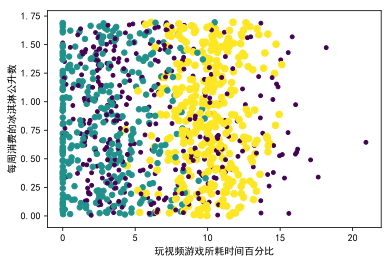

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

# 使用dating_data_mat的第1列、第2列数据
ax.scatter(dating_data_mat[:, 1], dating_data_mat[:, 2],
          15.0*np.array(dating_labels), 15.0*np.array(dating_labels))

plt.xlabel('玩视频游戏所耗时间百分比')
plt.ylabel('每周消费的冰淇淋公升数')

这张图很难得出结论性的信息。

Text(0, 0.5, '玩视频游戏所耗时间百分比')

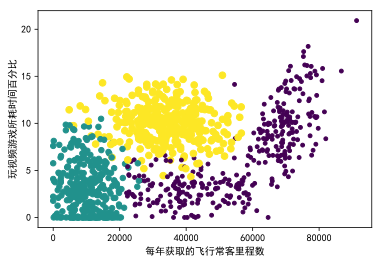

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

# 使用dating_data_mat的第0列、第1列数据
ax.scatter(dating_data_mat[:, 0], dating_data_mat[:, 1],
          15.0*np.array(dating_labels), 15.0*np.array(dating_labels))

plt.xlabel('每年获取的飞行常客里程数')
plt.ylabel('玩视频游戏所耗时间百分比')

这张图清晰地标识了三个不同的样本分类区域。

## 准备数据：归一化数值

如果直接采用上面的数据计算两个样本之间的欧式距离，那么就会发现，数值较大的特征对计算结果的影响最大，但这三个特征其实是等权重的。所以，我们需要**将数值归一化**。

将任意取值范围的特征值归为0-1区间内的值：  
$$ newValue = \frac {oldValue - min} {max - min}$$

In [12]:
def auto_norm(data_set):
    """
    计算并返回归一化的特征值矩阵
    
    Parameters
    ----------
    data_set : numpy.ndarray
        需要归一化的特征值矩阵
    
    Returns
    -------
    norm_data_set : numpy.ndarray
        归一化之后的特征值矩阵
    ranges : numpy.ndarray
        特征值矩阵每一列的最大最小值之差
    min_vals : numpy.ndarray
        特征值矩阵每一列的最小值
    """
    data_set = dating_data_mat
    
    # 选取每一列的最大最小值，如果没有参数0，则会选取每一行的最大最小值
    min_vals = data_set.min(0)    
    max_vals = data_set.max(0)
    ranges = max_vals - min_vals
    norm_data_set = (data_set - min_vals) / ranges
    
    return norm_data_set, ranges, min_vals

In [13]:
norm_mat, ranges, min_vals = auto_norm(dating_data_mat)

In [14]:
# 归一化之后的特征值矩阵
norm_mat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [15]:
# 特征值矩阵每一列的最大最小值之差
ranges

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

In [16]:
# 特征值矩阵每一列的最小值
min_vals

array([0.      , 0.      , 0.001156])

## 测试算法：作为完整程序验证分类器

通常采用已有数据的90%作为训练样本来训练分类器，而使用其余的10%数据去测试分类器。

In [64]:
def dating_class_test(ho_ratio=0.10):
    """
    测试数据：norm_mat[0:num_test_vecs]
    训练数据：norm_mat[num_test_vecs:m]
    
    Parameters
    ----------
    ho_ratio:
        测试数据的比例
    """
    # 导入数据集
    dating_data_mat, dating_labels = file2matrix(r'.\datasource\Ch02\datingTestSet.txt')
    norm_mat, ranges, min_vals = auto_norm(dating_data_mat)
    m = norm_mat.shape[0]    # 一共有m个数据
    num_test_vecs = int(m * ho_ratio)    # 
    error_count = 0.0
    for i in range(num_test_vecs):
        classifier_result = classify0(norm_mat[i, :],
                                      norm_mat[num_test_vecs:m, :],
                                      dating_labels[num_test_vecs:m],
                                      3)
        #print("the classifier came back with: %d, the real answer is:%d" %
        #     (classifier_result, dating_labels[i]))
        if classifier_result != dating_labels[i]:
            error_count += 1.0
    # end for
    print("the total error rate is: %f" % (error_count / float(num_test_vecs)))
    print(error_count)

In [65]:
dating_class_test()

the total error rate is: 0.050000
5.0


分类器处理约会数据集的错误率是5.0%。

In [66]:
# 修改测试数据的比例为50%
dating_class_test(0.5)

the total error rate is: 0.068000
34.0


可以看到，测试数据越多，即训练数据越少，错误率越高。

我们可以通过修改`ho_ratio`和`k`，得到不同的分类效果。

## 使用算法：构建完整可用系统

构造一个程序，直接输入某个人的信息，程序就会给出喜欢程序的预测值。

In [71]:
def classify_person():
    result_list = ['not at all', 'in small doses', 'in large doses']
    # 让用户输入数据
    percent_tats = float(input("percentage of time spent playing video games?"))
    ff_miles = float(input("frequent flier miles earned per year?"))
    ice_cream = float(input("liters of ice cream consumed per year?"))
    dating_data_mat, dating_labels = file2matrix(r'.\datasource\Ch02\datingTestSet2.txt')
    norm_mat, ranges, min_vals = auto_norm(dating_data_mat)
    in_arr = np.array([ff_miles, percent_tats, ice_cream, ])
    classifier_result = classify0((in_arr - min_vals)/ranges,
                                  norm_mat,
                                  dating_labels,
                                  3)
    print("You will probably like this person: %s" % result_list[classifier_result - 1])

In [72]:
classify_person()

percentage of time spent playing video games?10
frequent flier miles earned per year?1000
liters of ice cream consumed per year?0.5
You will probably like this person: in small doses


# 手写识别系统

构造一个只能识别数字0到9的简单手写识别系统。

## 准备数据：将图像转换为测试向量

数据集
* 训练数据：trainningDigits，大约2000个数据；
* 测试数据：testDigits，大约900个数据。

为了使用之前的分类器，我们必须把32 * 32的二进制图像矩阵转换为1 * 1024的向量。

In [10]:
def img2vector(filename):
    return_vect = np.zeros((1, 1024))
    fr = open(filename)
    for i in range(32):
        line_str = fr.readline()
        for j in range(32):
            return_vect[0, 32*i + j] = int(line_str[j])
    return return_vect

In [11]:
# 选取一个测试数据
filename = r'.\datasource\Ch02\digits\testDigits\0_13.txt'
test_vector = img2vector(filename)

In [12]:
test_vector

array([[0., 0., 0., ..., 0., 0., 0.]])

最终结果是一个嵌套的NumPy数组，不懂什么需要一个嵌套的数组？？改成非嵌套数组，看后面的img2vector能否运行。

In [83]:
len(test_vector[0])

1024

## 测试算法：使用k-近邻算法识别手写数字

In [3]:
import os

In [4]:
hw_labels = []
# load the training set
training_dir = r'.\datasource\Ch02\digits\trainingDigits'
training_file_list = os.listdir(training_dir)   
training_file_list

['0_0.txt',
 '0_1.txt',
 '0_10.txt',
 '0_100.txt',
 '0_101.txt',
 '0_102.txt',
 '0_103.txt',
 '0_104.txt',
 '0_105.txt',
 '0_106.txt',
 '0_107.txt',
 '0_108.txt',
 '0_109.txt',
 '0_11.txt',
 '0_110.txt',
 '0_111.txt',
 '0_112.txt',
 '0_113.txt',
 '0_114.txt',
 '0_115.txt',
 '0_116.txt',
 '0_117.txt',
 '0_118.txt',
 '0_119.txt',
 '0_12.txt',
 '0_120.txt',
 '0_121.txt',
 '0_122.txt',
 '0_123.txt',
 '0_124.txt',
 '0_125.txt',
 '0_126.txt',
 '0_127.txt',
 '0_128.txt',
 '0_129.txt',
 '0_13.txt',
 '0_130.txt',
 '0_131.txt',
 '0_132.txt',
 '0_133.txt',
 '0_134.txt',
 '0_135.txt',
 '0_136.txt',
 '0_137.txt',
 '0_138.txt',
 '0_139.txt',
 '0_14.txt',
 '0_140.txt',
 '0_141.txt',
 '0_142.txt',
 '0_143.txt',
 '0_144.txt',
 '0_145.txt',
 '0_146.txt',
 '0_147.txt',
 '0_148.txt',
 '0_149.txt',
 '0_15.txt',
 '0_150.txt',
 '0_151.txt',
 '0_152.txt',
 '0_153.txt',
 '0_154.txt',
 '0_155.txt',
 '0_156.txt',
 '0_157.txt',
 '0_158.txt',
 '0_159.txt',
 '0_16.txt',
 '0_160.txt',
 '0_161.txt',
 '0_162.txt',
 '0

In [5]:
m = len(training_file_list)
training_mat = np.zeros((m, 1024))
training_mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
for i in range(m):
    file_name_str = training_file_list[i]
    file_str = file_name_str.split('.')[0]    # take off .txt
    class_num = int(file_str.split('_')[0])    # 文件对应的数字
    hw_labels.append(class_num)
    training_mat[i, :] = img2vector(training_dir + r'\%s' % file_name_str)

In [15]:
training_mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
# load the testing set
test_dir = r'.\datasource\Ch02\digits\testDigits'
test_file_list = os.listdir(test_dir)   
test_file_list

['0_0.txt',
 '0_1.txt',
 '0_10.txt',
 '0_11.txt',
 '0_12.txt',
 '0_13.txt',
 '0_14.txt',
 '0_15.txt',
 '0_16.txt',
 '0_17.txt',
 '0_18.txt',
 '0_19.txt',
 '0_2.txt',
 '0_20.txt',
 '0_21.txt',
 '0_22.txt',
 '0_23.txt',
 '0_24.txt',
 '0_25.txt',
 '0_26.txt',
 '0_27.txt',
 '0_28.txt',
 '0_29.txt',
 '0_3.txt',
 '0_30.txt',
 '0_31.txt',
 '0_32.txt',
 '0_33.txt',
 '0_34.txt',
 '0_35.txt',
 '0_36.txt',
 '0_37.txt',
 '0_38.txt',
 '0_39.txt',
 '0_4.txt',
 '0_40.txt',
 '0_41.txt',
 '0_42.txt',
 '0_43.txt',
 '0_44.txt',
 '0_45.txt',
 '0_46.txt',
 '0_47.txt',
 '0_48.txt',
 '0_49.txt',
 '0_5.txt',
 '0_50.txt',
 '0_51.txt',
 '0_52.txt',
 '0_53.txt',
 '0_54.txt',
 '0_55.txt',
 '0_56.txt',
 '0_57.txt',
 '0_58.txt',
 '0_59.txt',
 '0_6.txt',
 '0_60.txt',
 '0_61.txt',
 '0_62.txt',
 '0_63.txt',
 '0_64.txt',
 '0_65.txt',
 '0_66.txt',
 '0_67.txt',
 '0_68.txt',
 '0_69.txt',
 '0_7.txt',
 '0_70.txt',
 '0_71.txt',
 '0_72.txt',
 '0_73.txt',
 '0_74.txt',
 '0_75.txt',
 '0_76.txt',
 '0_77.txt',
 '0_78.txt',
 '0_79.

In [36]:
errorCount = 0.0    # 错误次数
len_test = len(test_file_list)
for i in range(len_test):
    file_name_str = test_file_list[i]
    file_str = file_name_str.split('.')[0]    # take off .txt
    class_num = int(file_str.split('_')[0])    # 文件对应的数字
    vector_under_test = img2vector(test_dir + r'\%s' % file_name_str)
    classifier_result = classify0(vector_under_test,
                                  training_mat,
                                  hw_labels,
                                  3)
    #print("the classifier came back with: %d, the real answer is: %d" % (classifier_result, class_num))
    if (classifier_result != class_num):
        errorCount += 1.0
print("the total number of error is: %d" % errorCount)
print("the total error rate is: %f" % (errorCount/float(len_test)))

the total number of error is: 394
the total error rate is: 0.416490


k-近邻算法识别手写数字数据集，错误率为。。怎么和书里不一样。